In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# EDA

In [3]:
zmt = pd.read_csv('./zomato.csv')

In [4]:
zmt.shape

(51717, 17)

In [5]:
zmt.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Cleaning

In [6]:
zmt.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

 #### 1. Renaming the columns
First let's get rid of confusing long column names  
* listed_in(type) -> rest_category
* listed_in(city) -> city
* approx_cost(for two people) -> cost_for_two
* rate -> rating
  

In [7]:
zmt.rename(columns={"listed_in(type)":"rest_category", "listed_in(city)":"city", "approx_cost(for two people)":"cost_for_two", "rate":"rating"}, inplace=True)

In [8]:
zmt.dtypes

url              object
address          object
name             object
online_order     object
book_table       object
rating           object
votes             int64
phone            object
location         object
rest_type        object
dish_liked       object
cuisines         object
cost_for_two     object
reviews_list     object
menu_item        object
rest_category    object
city             object
dtype: object

#### 2. Deleting redundant columns
Let's get rid of redundant or duplicate columns
* __'url'__ is redundant for our analyses so let's remove it.

In [9]:
zmt.drop(columns='url', inplace=True)

In [10]:
zmt[['location', 'city']]

,location,city
0,Banashankari,Banashankari
1,Banashankari,Banashankari
2,Banashankari,Banashankari
3,Banashankari,Banashankari
4,Basavanagudi,Banashankari
...,...,...
51712,Whitefield,Whitefield
51713,Whitefield,Whitefield
51714,Whitefield,Whitefield
51715,"ITPL Main Road, Whitefield",Whitefield


In [11]:
zmt[['location', 'city']].isna().sum() # It seems location and city are different

location    21
city         0
dtype: int64

* __location__ and __city__ give the same information so let's drop the one which has the most missing values.

In [12]:
zmt.drop(columns="location", inplace=True)
zmt.reset_index(drop=True)

,address,name,online_order,book_table,rating,votes,phone,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,menu_item,rest_category,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [13]:
zmt.dtypes

address          object
name             object
online_order     object
book_table       object
rating           object
votes             int64
phone            object
rest_type        object
dish_liked       object
cuisines         object
cost_for_two     object
reviews_list     object
menu_item        object
rest_category    object
city             object
dtype: object

In [14]:
zmt[['rest_type', 'rest_category']]

,rest_type,rest_category
0,Casual Dining,Buffet
1,Casual Dining,Buffet
2,"Cafe, Casual Dining",Buffet
3,Quick Bites,Buffet
4,Casual Dining,Buffet
...,...,...
51712,Bar,Pubs and bars
51713,Bar,Pubs and bars
51714,Bar,Pubs and bars
51715,Bar,Pubs and bars


In [15]:
print(zmt.rest_type.unique())
print(zmt.rest_category.unique())

['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' nan 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Food Court, Quick Bites' 'Pub, Bar' 'Casual Dining, Pub' 'Lounge, Bar'
 'Food Court, Dessert Parlor' 'Casual Dining, Sweet Shop'
 'Food Court, Casual Dining' 'Casual Dining, Microbrewery'
 'Sweet Shop, Desser

In [16]:
zmt[['rest_type', 'rest_category']].isna().sum()

rest_type        227
rest_category      0
dtype: int64

* __rest_type__ and __rest_category__ give the same type of information so we can keep one of them, in this case since __rest_category__ doesn't have missing values let's keep it.

In [17]:
zmt.drop(columns="rest_type", inplace=True)


In [18]:
zmt.reset_index(drop=True)

,address,name,online_order,book_table,rating,votes,phone,dish_liked,cuisines,cost_for_two,reviews_list,menu_item,rest_category,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


#### 3. Dropping duplicates.

In [19]:
zmt.duplicated().sum()

40

In [20]:
zmt.drop_duplicates(inplace=True, ignore_index=True)

In [21]:
zmt.shape

(51677, 14)

In [22]:
zmt.dtypes

address          object
name             object
online_order     object
book_table       object
rating           object
votes             int64
phone            object
dish_liked       object
cuisines         object
cost_for_two     object
reviews_list     object
menu_item        object
rest_category    object
city             object
dtype: object

#### 4. Cleaning individual columns

*Columns to make numeric:* 
* rate
* cost_for_two

In [23]:
zmt.rating.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
# replace 'New' values with the lowest rate value
zmt.rating.replace(to_replace='NEW', value='1/5', inplace=True)

# replace missing values '-' with the most frequent value of rate
zmt.rating.replace(to_replace='-', value=zmt.rating.mode()[0], inplace=True)

# fill nan values with mean rate (2.5)
zmt.rating.fillna('2.5/5', inplace=True)

In [25]:
zmt.rating.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '1/5', '2.9/5', '3.5/5', '2.5/5', '2.6/5', '3.8 /5',
       '3.4/5', '4.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [26]:
zmt.rating = zmt.rating.apply(lambda x: str(x)[:str(x).find("/")]).astype(float)

In [27]:
zmt.rating

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51672    3.6
51673    2.5
51674    2.5
51675    4.3
51676    3.4
Name: rating, Length: 51677, dtype: float64

In [28]:
zmt.cost_for_two.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [29]:
zmt.cost_for_two = zmt.cost_for_two.str.replace(',', '.').astype('float')

In [30]:
zmt.cost_for_two

0        800.0
1        800.0
2        800.0
3        300.0
4        600.0
         ...  
51672      1.5
51673    600.0
51674      2.0
51675      2.5
51676      1.5
Name: cost_for_two, Length: 51677, dtype: float64

In [31]:
zmt.dtypes

address           object
name              object
online_order      object
book_table        object
rating           float64
votes              int64
phone             object
dish_liked        object
cuisines          object
cost_for_two     float64
reviews_list      object
menu_item         object
rest_category     object
city              object
dtype: object

#### 5. Removing the NaN values from the dataset

In [32]:
zmt.isna().sum()

address              0
name                 0
online_order         0
book_table           0
rating               0
votes                0
phone             1207
dish_liked       28049
cuisines            45
cost_for_two       345
reviews_list         0
menu_item            0
rest_category        0
city                 0
dtype: int64

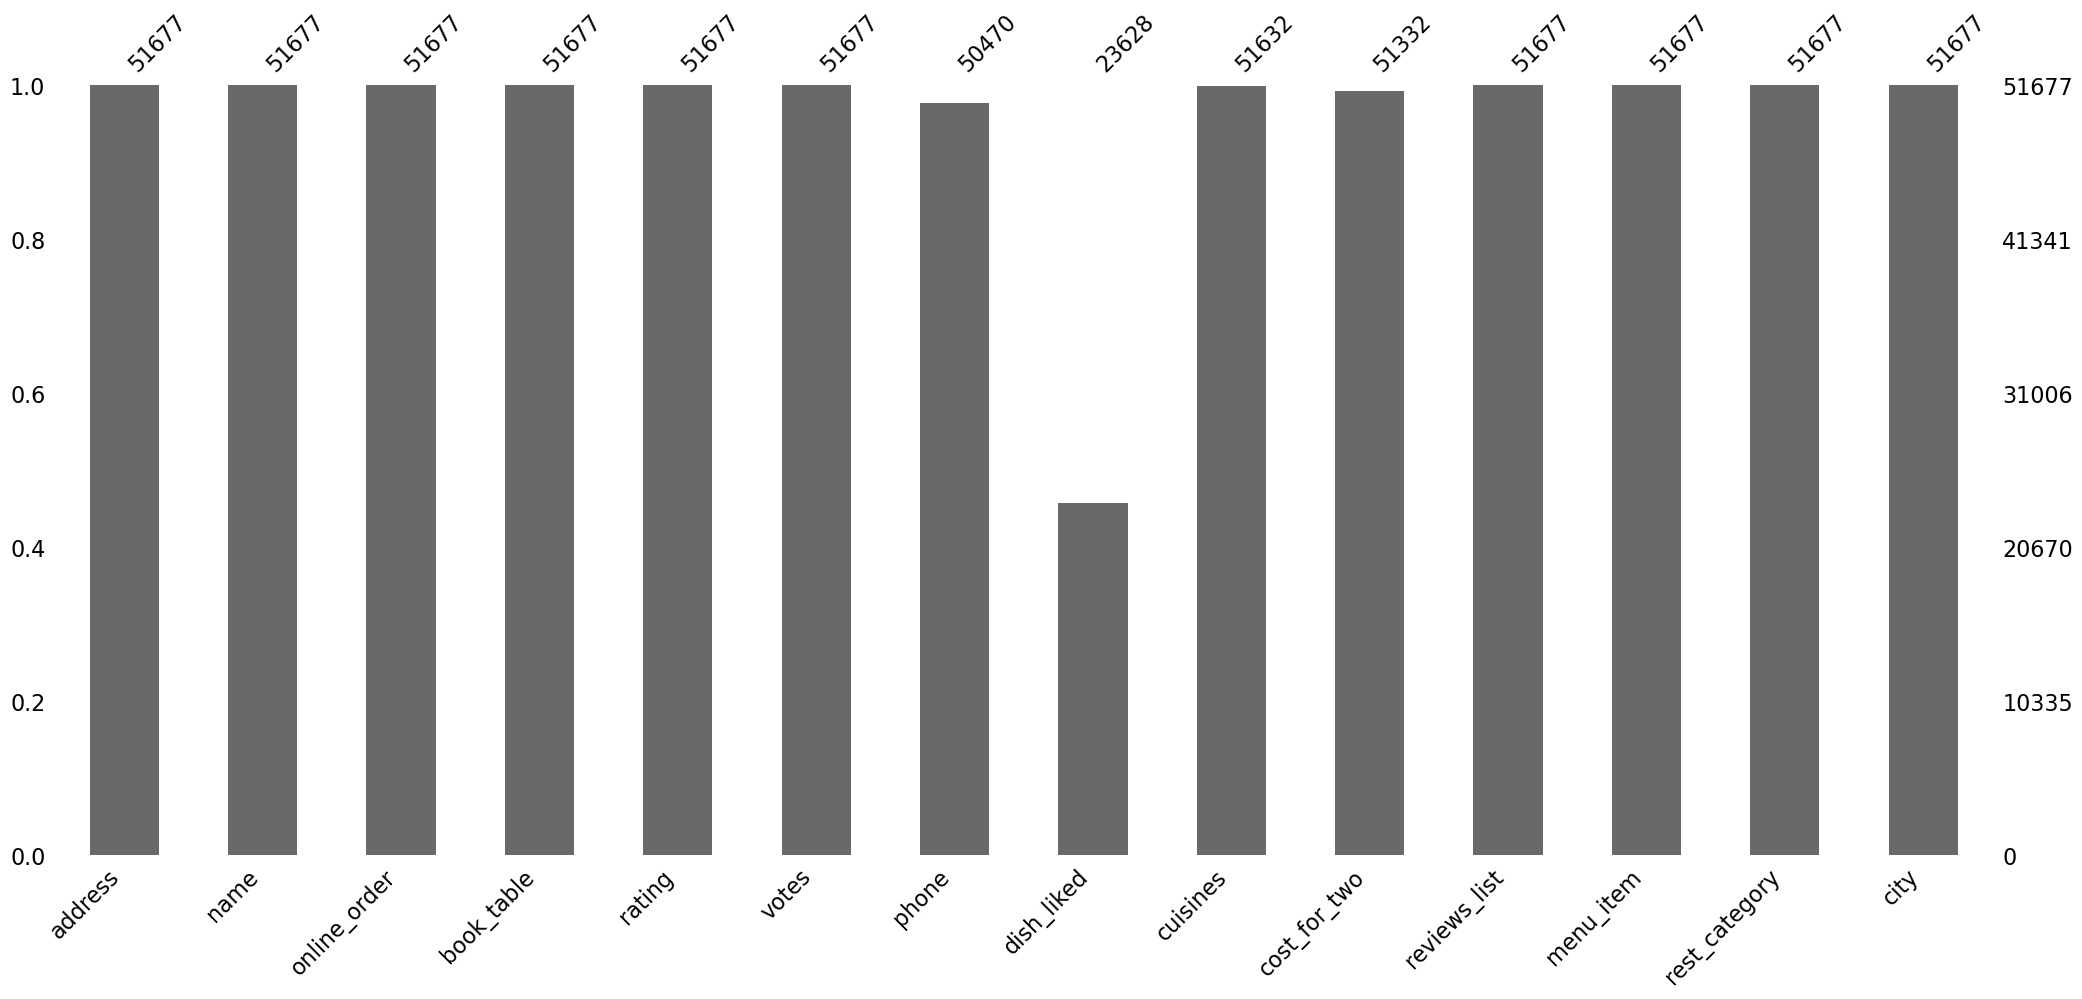

In [33]:
missingno.bar(zmt)
plt.show()

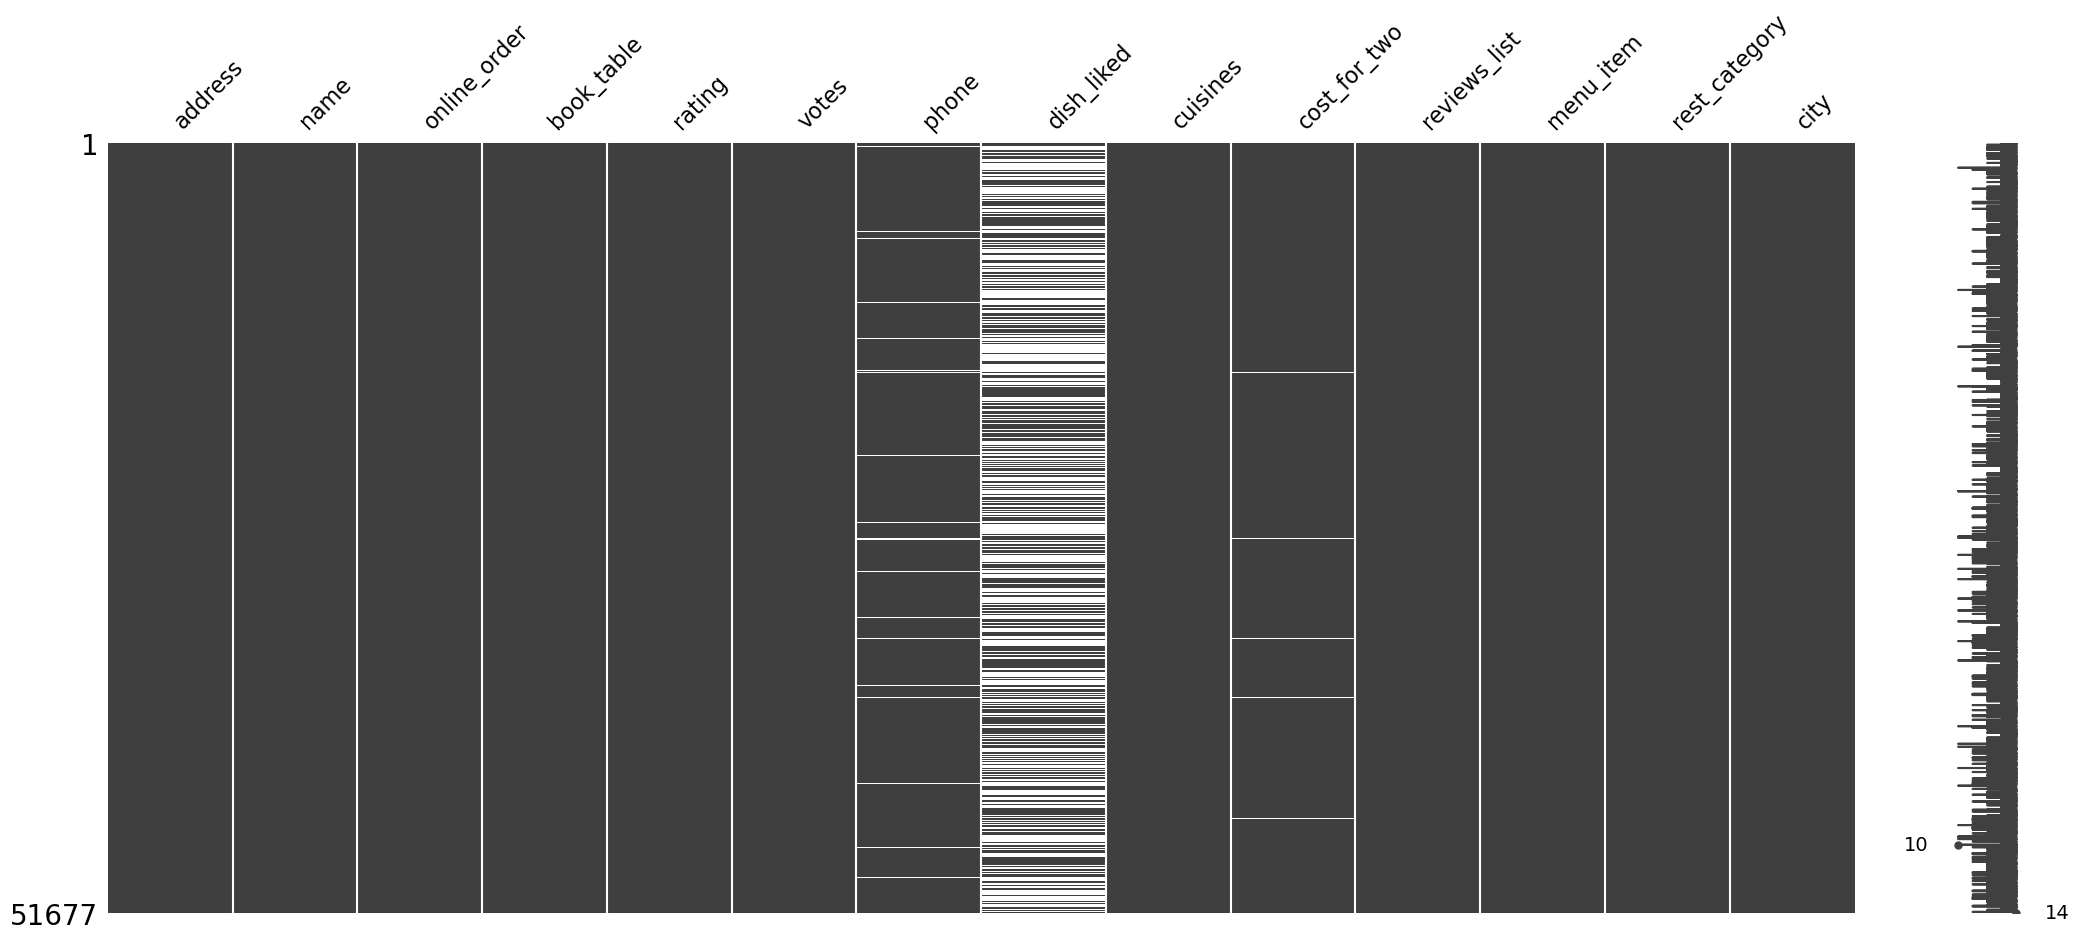

In [34]:
missingno.matrix(zmt)
plt.show()

In [35]:
zmt.isnull().mean() * 100

address           0.000000
name              0.000000
online_order      0.000000
book_table        0.000000
rating            0.000000
votes             0.000000
phone             2.335662
dish_liked       54.277532
cuisines          0.087079
cost_for_two      0.667608
reviews_list      0.000000
menu_item         0.000000
rest_category     0.000000
city              0.000000
dtype: float64

Let's drop columns with more then 50% nan values (keep the columns which have at least 50% non nan values)

In [36]:
zmt.dropna(axis=1, thresh=zmt.shape[0]//2, inplace=True)

In [37]:
zmt.isna().sum()

address             0
name                0
online_order        0
book_table          0
rating              0
votes               0
phone            1207
cuisines           45
cost_for_two      345
reviews_list        0
menu_item           0
rest_category       0
city                0
dtype: int64

* __phone__ - Let's complete with a phone number of the first restaurant located in the same city. 
* __cuisines__ - Let's complete with cuisine of a restaurant with the same menu_item, if those are several take the cuisine of the first restaurant of the group
* __cost_for_two__ - Let's complete with mean of cost_for_two of the restaurants in the same city with the same rating

In [38]:
# think of doing this in an efficient way
city_phone = zmt.groupby(['city']).apply(lambda row: row.phone.iloc[0])
for i in zmt.index:
    if pd.isnull(zmt.loc[i,'phone']):
        zmt.loc[i,'phone'] = city_phone[zmt.loc[i,'city']]

In [39]:
cuisine_menue = zmt.groupby('menu_item').apply(lambda x: x.cuisines.iloc[0])
for i in zmt.index:
    if pd.isnull(zmt.loc[i,'cuisines']):
        zmt.loc[i,'cuisines'] = cuisine_menue[zmt.loc[i,'menu_item']]

In [40]:
ct_rt_cost = zmt.groupby(['city', 'rating']).apply(lambda row: row.cost_for_two.mean())

for i in zmt.index:
    if pd.isnull(zmt.loc[i,'cost_for_two']):
        zmt.loc[i,'cost_for_two'] = ct_rt_cost[zmt.loc[i,'city'], zmt.loc[i,'rating']]

In [41]:
zmt.isna().sum()

address          0
name             0
online_order     0
book_table       0
rating           0
votes            0
phone            0
cuisines         5
cost_for_two     0
reviews_list     0
menu_item        0
rest_category    0
city             0
dtype: int64

As we can see we still have **cuisines** with nans, those are the cuisines for which there's no restaurant found with the same menu_item. In this case we can complete with the cuisine of a restaurant which shares more then 70% of menue_item. This case should be handled separately. (Because of lack of time this issue will be solved in the nearest future:) ) For now let's complete the remaining nans with the mode.

In [42]:
zmt.cuisines.fillna(zmt.cuisines.mode()[0], inplace=True)

In [43]:
zmt.isna().sum()

address          0
name             0
online_order     0
book_table       0
rating           0
votes            0
phone            0
cuisines         0
cost_for_two     0
reviews_list     0
menu_item        0
rest_category    0
city             0
dtype: int64

## Data Visualization

In [44]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51677 entries, 0 to 51676
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        51677 non-null  object 
 1   name           51677 non-null  object 
 2   online_order   51677 non-null  object 
 3   book_table     51677 non-null  object 
 4   rating         51677 non-null  float64
 5   votes          51677 non-null  int64  
 6   phone          51677 non-null  object 
 7   cuisines       51677 non-null  object 
 8   cost_for_two   51677 non-null  float64
 9   reviews_list   51677 non-null  object 
 10  menu_item      51677 non-null  object 
 11  rest_category  51677 non-null  object 
 12  city           51677 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 5.1+ MB


In [45]:
rest_online_order_distr = zmt.groupby('online_order').apply(lambda x: x.online_order.size/zmt.shape[0]*100)
rest_table_booking_distr = zmt.groupby('book_table').apply(lambda x: x.book_table.size/zmt.shape[0]*100)
crest_onln_del_tbl_bk = zmt[(zmt.online_order=='Yes') & (zmt.book_table=='Yes')].shape[0]
print(rest_online_order_distr)
print(rest_table_booking_distr)

online_order
No     41.147899
Yes    58.852101
dtype: float64
book_table
No     87.534106
Yes    12.465894
dtype: float64


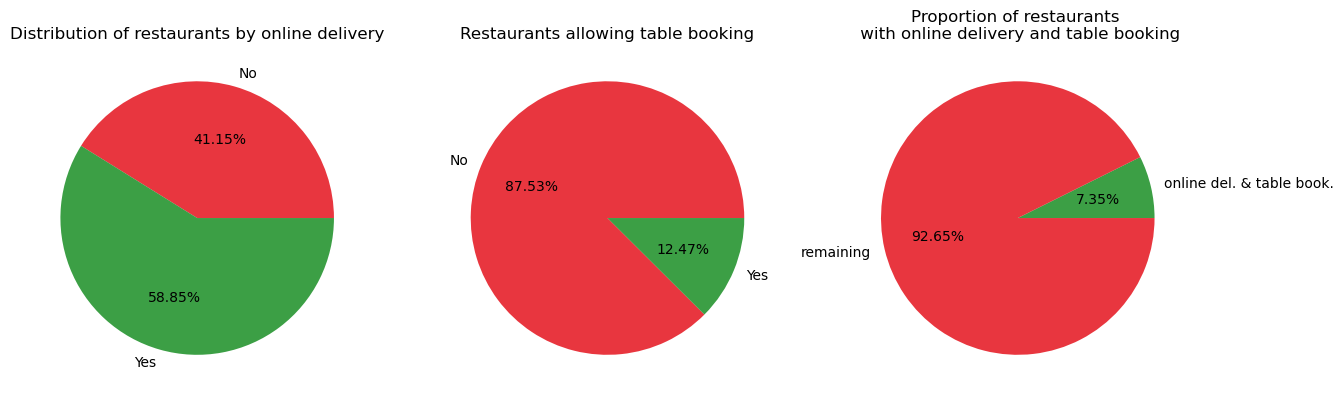

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6))

ax1.pie(x = rest_online_order_distr, labels = rest_online_order_distr.index, colors = ['#e3000bc9', '#078513c9'], autopct = "%.2f%%")
ax2.pie(x = rest_table_booking_distr, labels = rest_table_booking_distr.index, colors = ['#e3000bc9', '#078513c9'], autopct = "%.2f%%")
ax3.pie(x=[crest_onln_del_tbl_bk, zmt.shape[0]-crest_onln_del_tbl_bk], labels=['online del. & table book.', 'remaining'], colors = ['#078513c9', '#e3000bc9'], autopct = "%.2f%%")
ax1.set_title('Distribution of restaurants by online delivery', fontdict={'fontsize':12})
ax2.set_title('Restaurants allowing table booking', fontdict={'fontsize':12})
a = ax3.set_title('Proportion of restaurants \n with online delivery and table booking')

*Color Theory*  
Here it's better to use semantic colors: green to highlight good proportion of retaurants and red for the opposite.

<u>_Conclusion_</u>  
From pieplot we can see that more then half of the restaurants provide online delivery, but just 12.47% are allowing table booking. 7.36% of restaurants have both online delivery and table booking.

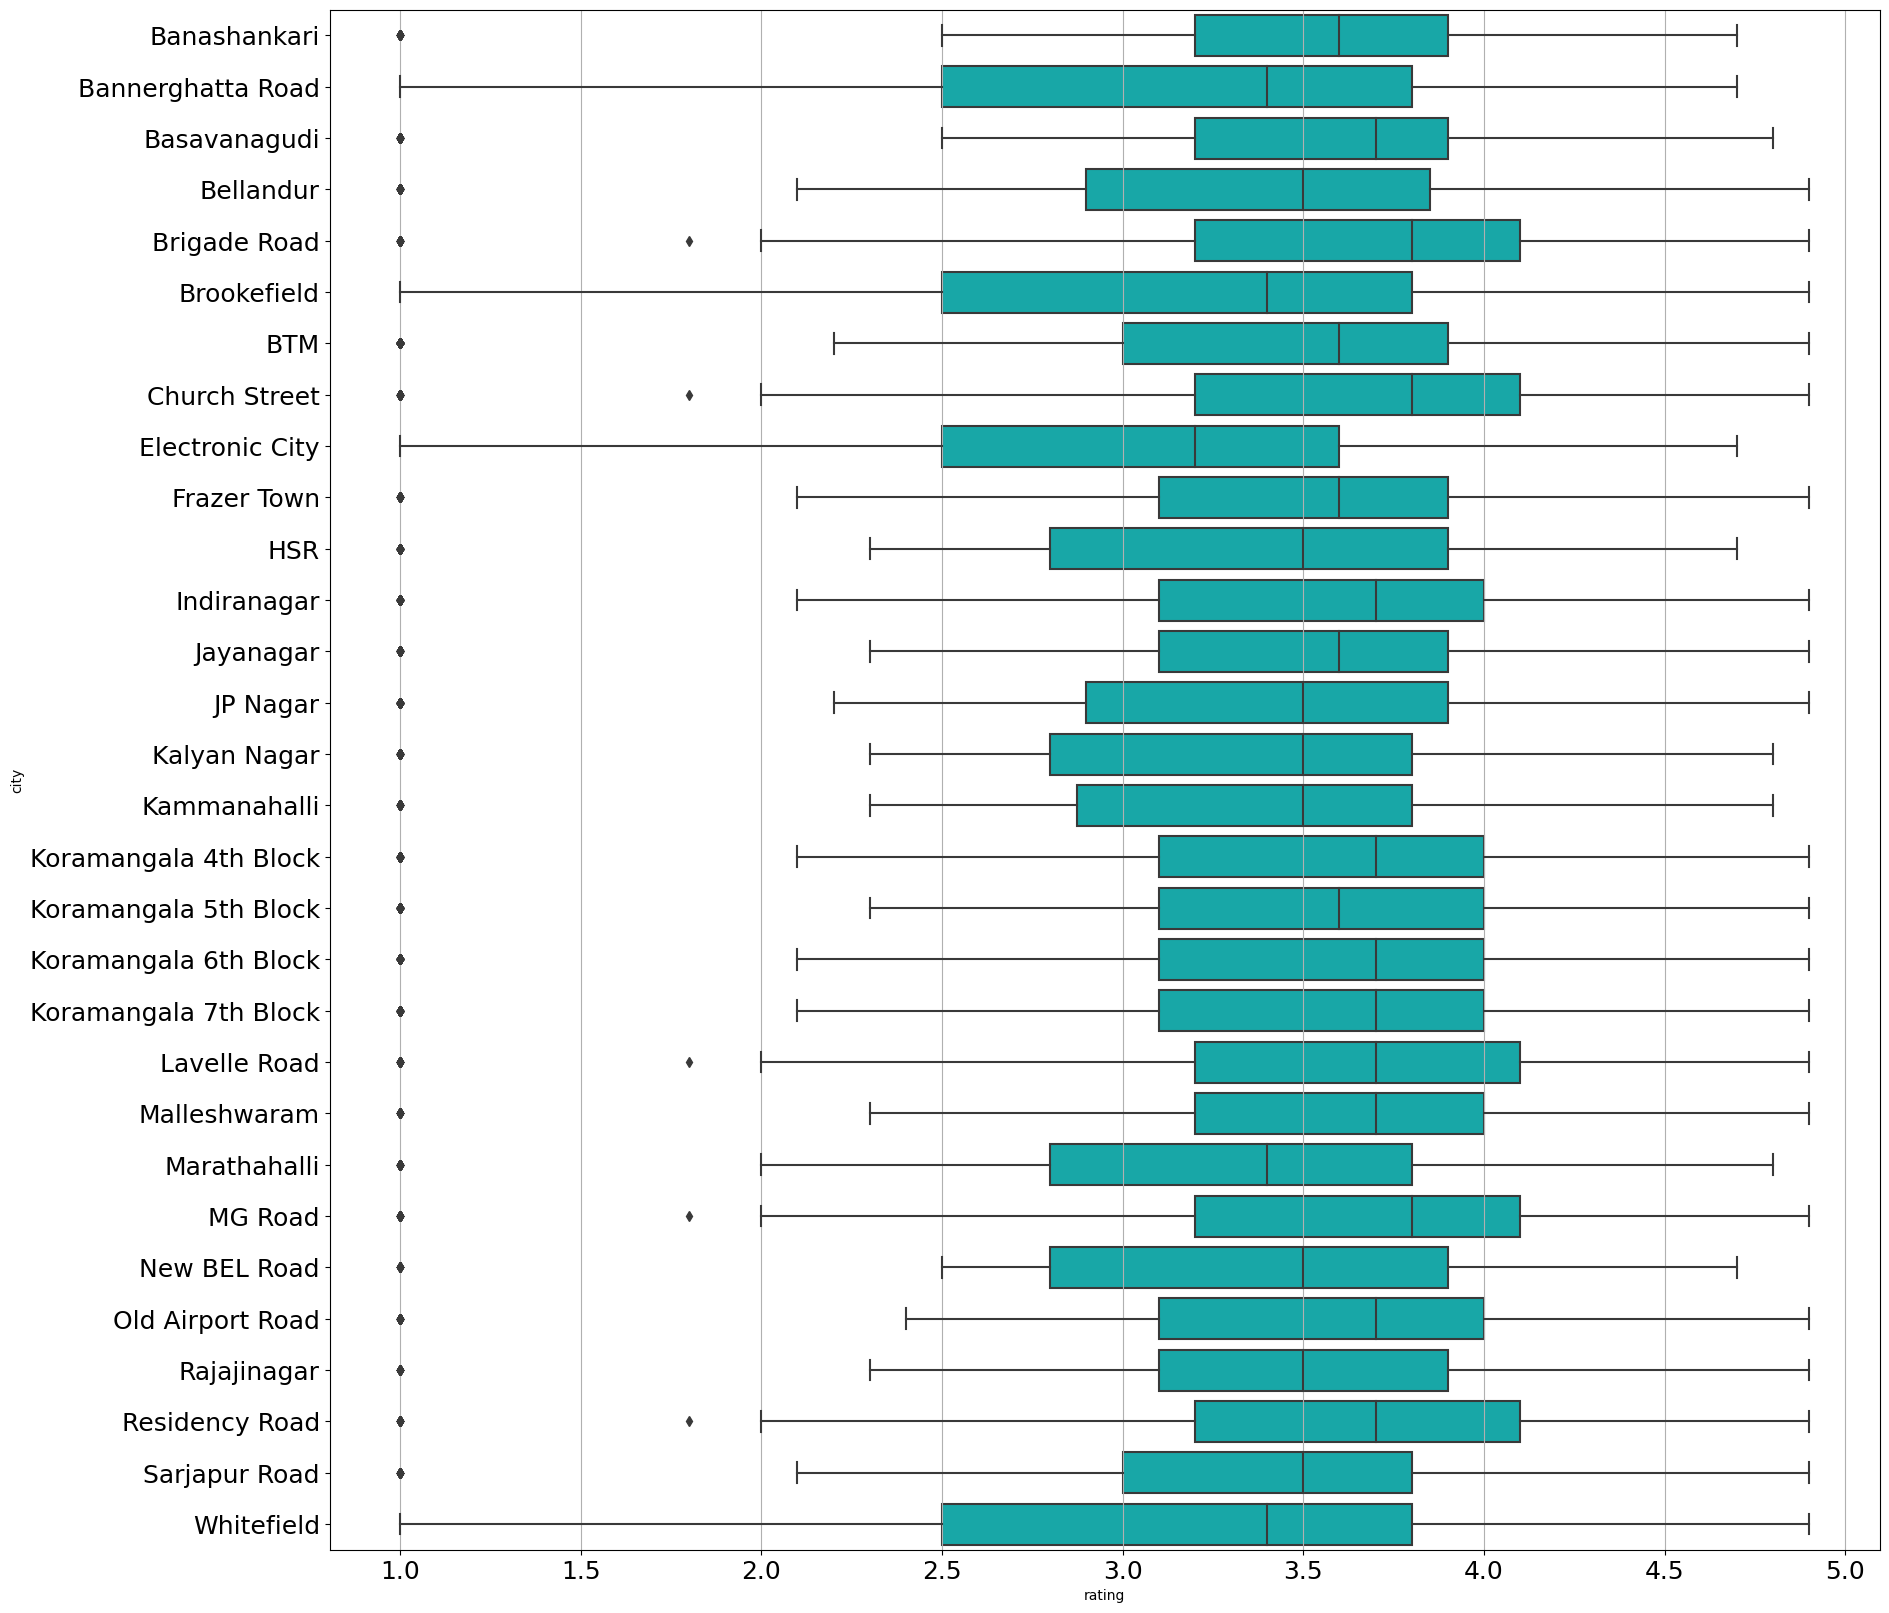

In [51]:
fig, ax = plt.subplots(1, 1, figsize = (20, 20))
b = sns.boxplot(data=zmt, x='rating', y='city', orient='h', ax=ax, color='c')
b.tick_params(labelsize=18)
ax.yaxis.grid(False)
ax.xaxis.grid(True)

_Color Theory_  
It's better to not separate boxplots by color as they are already in seperate rows showing different categories. 

<u>_Conclusion_</u>  
* Overly all cities' half of restaurants have rating grater then 3.5. 
* In most part of cities distribution of retaurant's rating doesn't differ much.

In [52]:
# cities with most expensive cost_for_two
avg_cost_for_two = zmt.groupby('city')['cost_for_two'].mean().sort_values(ascending=False)
avg_cost_for_two

city
Kalyan Nagar             398.735777
Kammanahalli             396.119483
HSR                      394.740369
Brookefield              388.029547
Bannerghatta Road        387.556510
Marathahalli             382.866249
Jayanagar                382.828511
JP Nagar                 380.054244
Koramangala 4th Block    378.952830
Sarjapur Road            378.938908
Bellandur                374.289134
New BEL Road             372.638323
Koramangala 6th Block    372.388336
BTM                      372.156216
Basavanagudi             372.120565
Banashankari             370.262065
Whitefield               365.046974
Koramangala 7th Block    364.323889
Koramangala 5th Block    364.181718
Electronic City          363.829394
Frazer Town              352.326642
Malleshwaram             348.114098
Old Airport Road         342.717133
Rajajinagar              338.422833
Indiranagar              336.363698
MG Road                  308.332297
Lavelle Road             308.117654
Brigade Road           

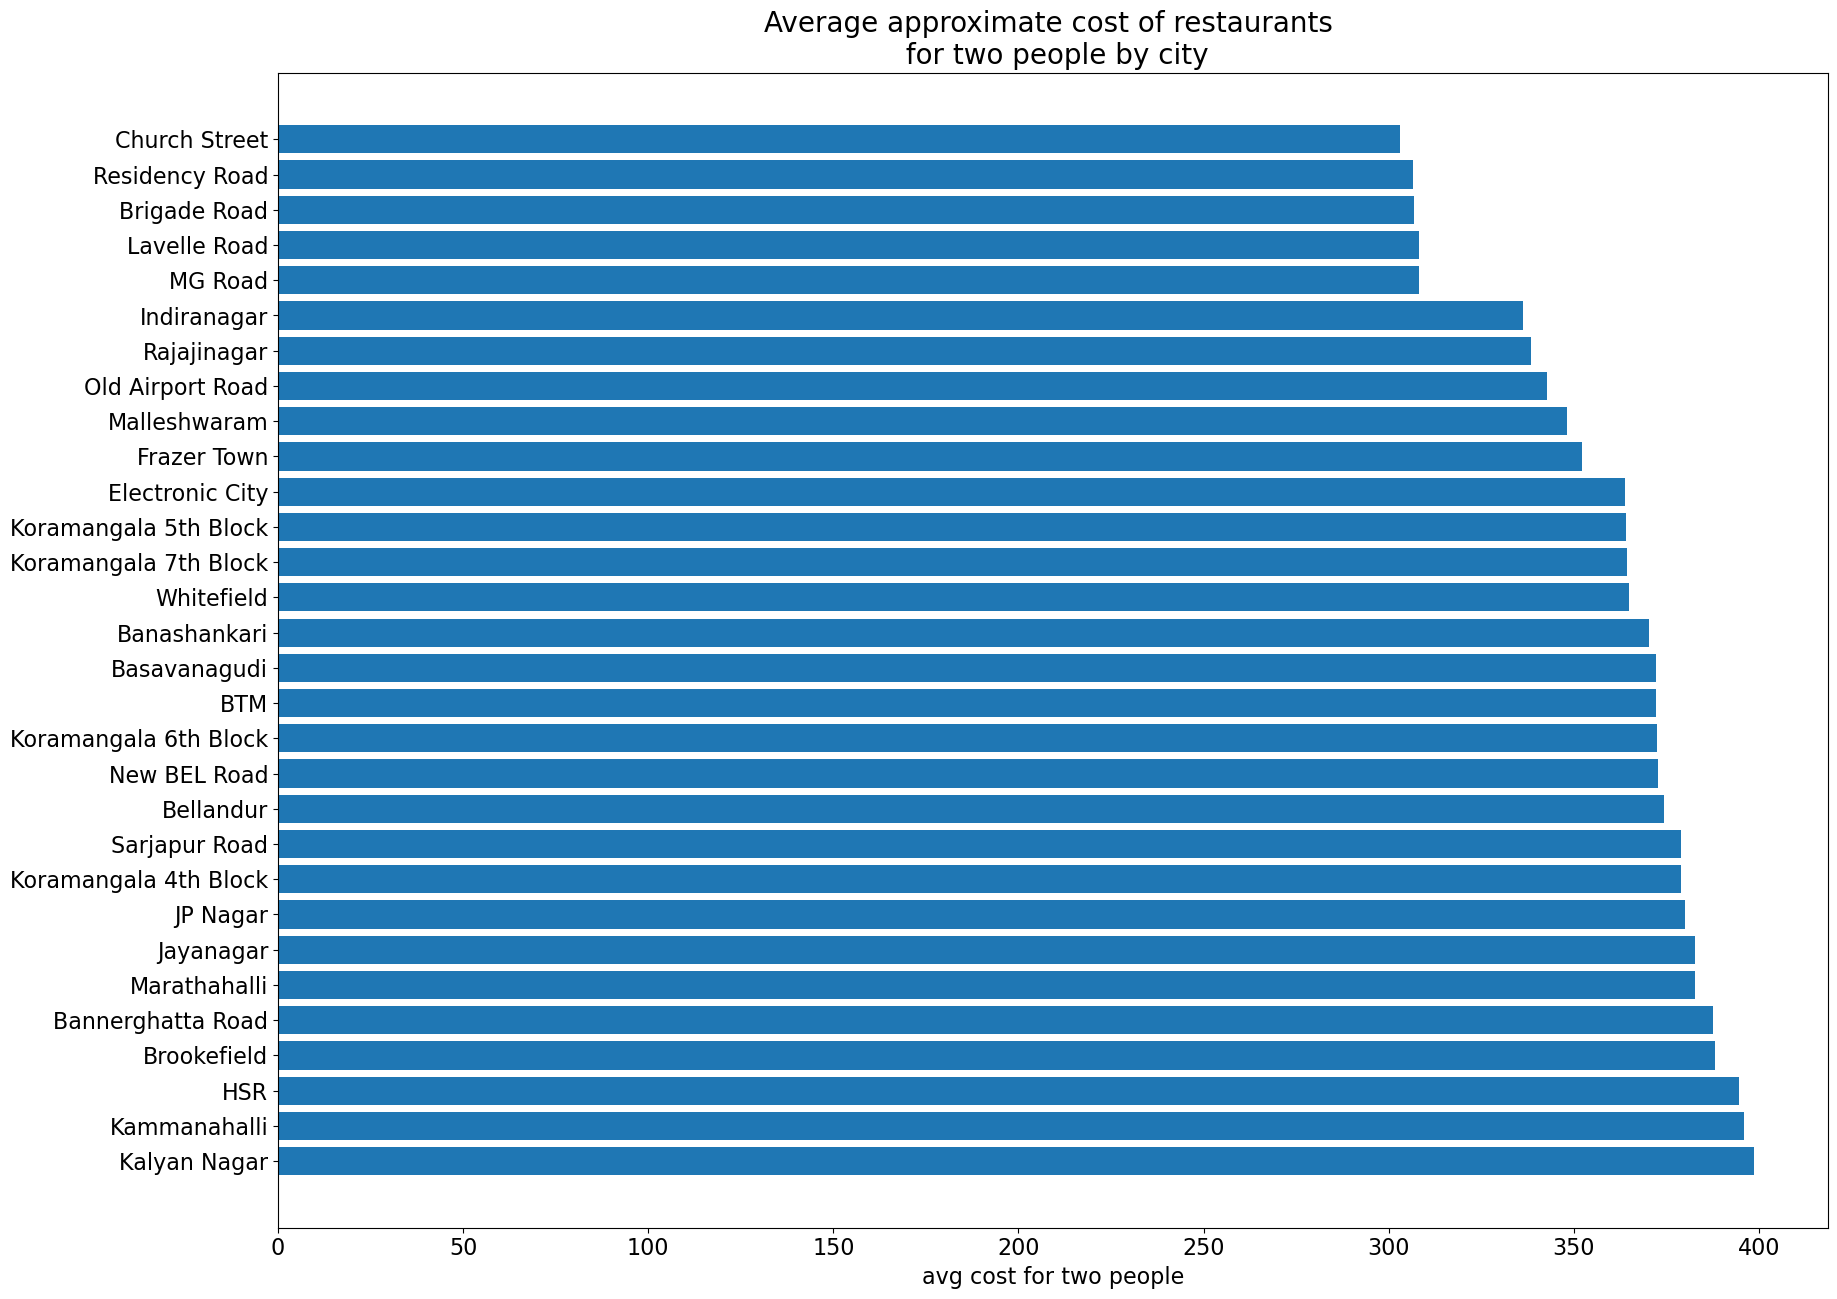

In [53]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1)
ax.barh(y=avg_cost_for_two.index, width=avg_cost_for_two.values)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_title('Average approximate cost of restaurants \n for two people by city', fontdict={'fontsize':20})
ax.set_xlabel('avg cost for two people', fontdict={'fontsize':16})
plt.show()

_Color Theory:_  
We've already seperated cities (categories) by bars in barchart so seperating them also by color would be _Color Overuse_.

<u>_Conclusion_</u>  
* In all cities the average cost of restaurants for two people fluctuates from 300 to 400.  
* Top 5 expensive cities by average cost for two people:
    1. Kalyan Nagar  
    2. Kammanahalli
    3. HSR
    4. Brookefield
    5. Bannerghatta Road

In [54]:
c_city_res = zmt.groupby('city')['address'].count().sort_values(ascending=False)
c_city_res

city
BTM                      3270
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2778
Koramangala 6th Block    2623
Jayanagar                2366
JP Nagar                 2096
Indiranagar              1859
Church Street            1818
MG Road                  1807
Brigade Road             1769
Lavelle Road             1741
HSR                      1741
Marathahalli             1658
Residency Road           1620
Whitefield               1619
Bannerghatta Road        1617
Brookefield              1517
Old Airport Road         1424
Kammanahalli             1328
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1227
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              862
New BEL Road              740
Name: address, dtype: int64

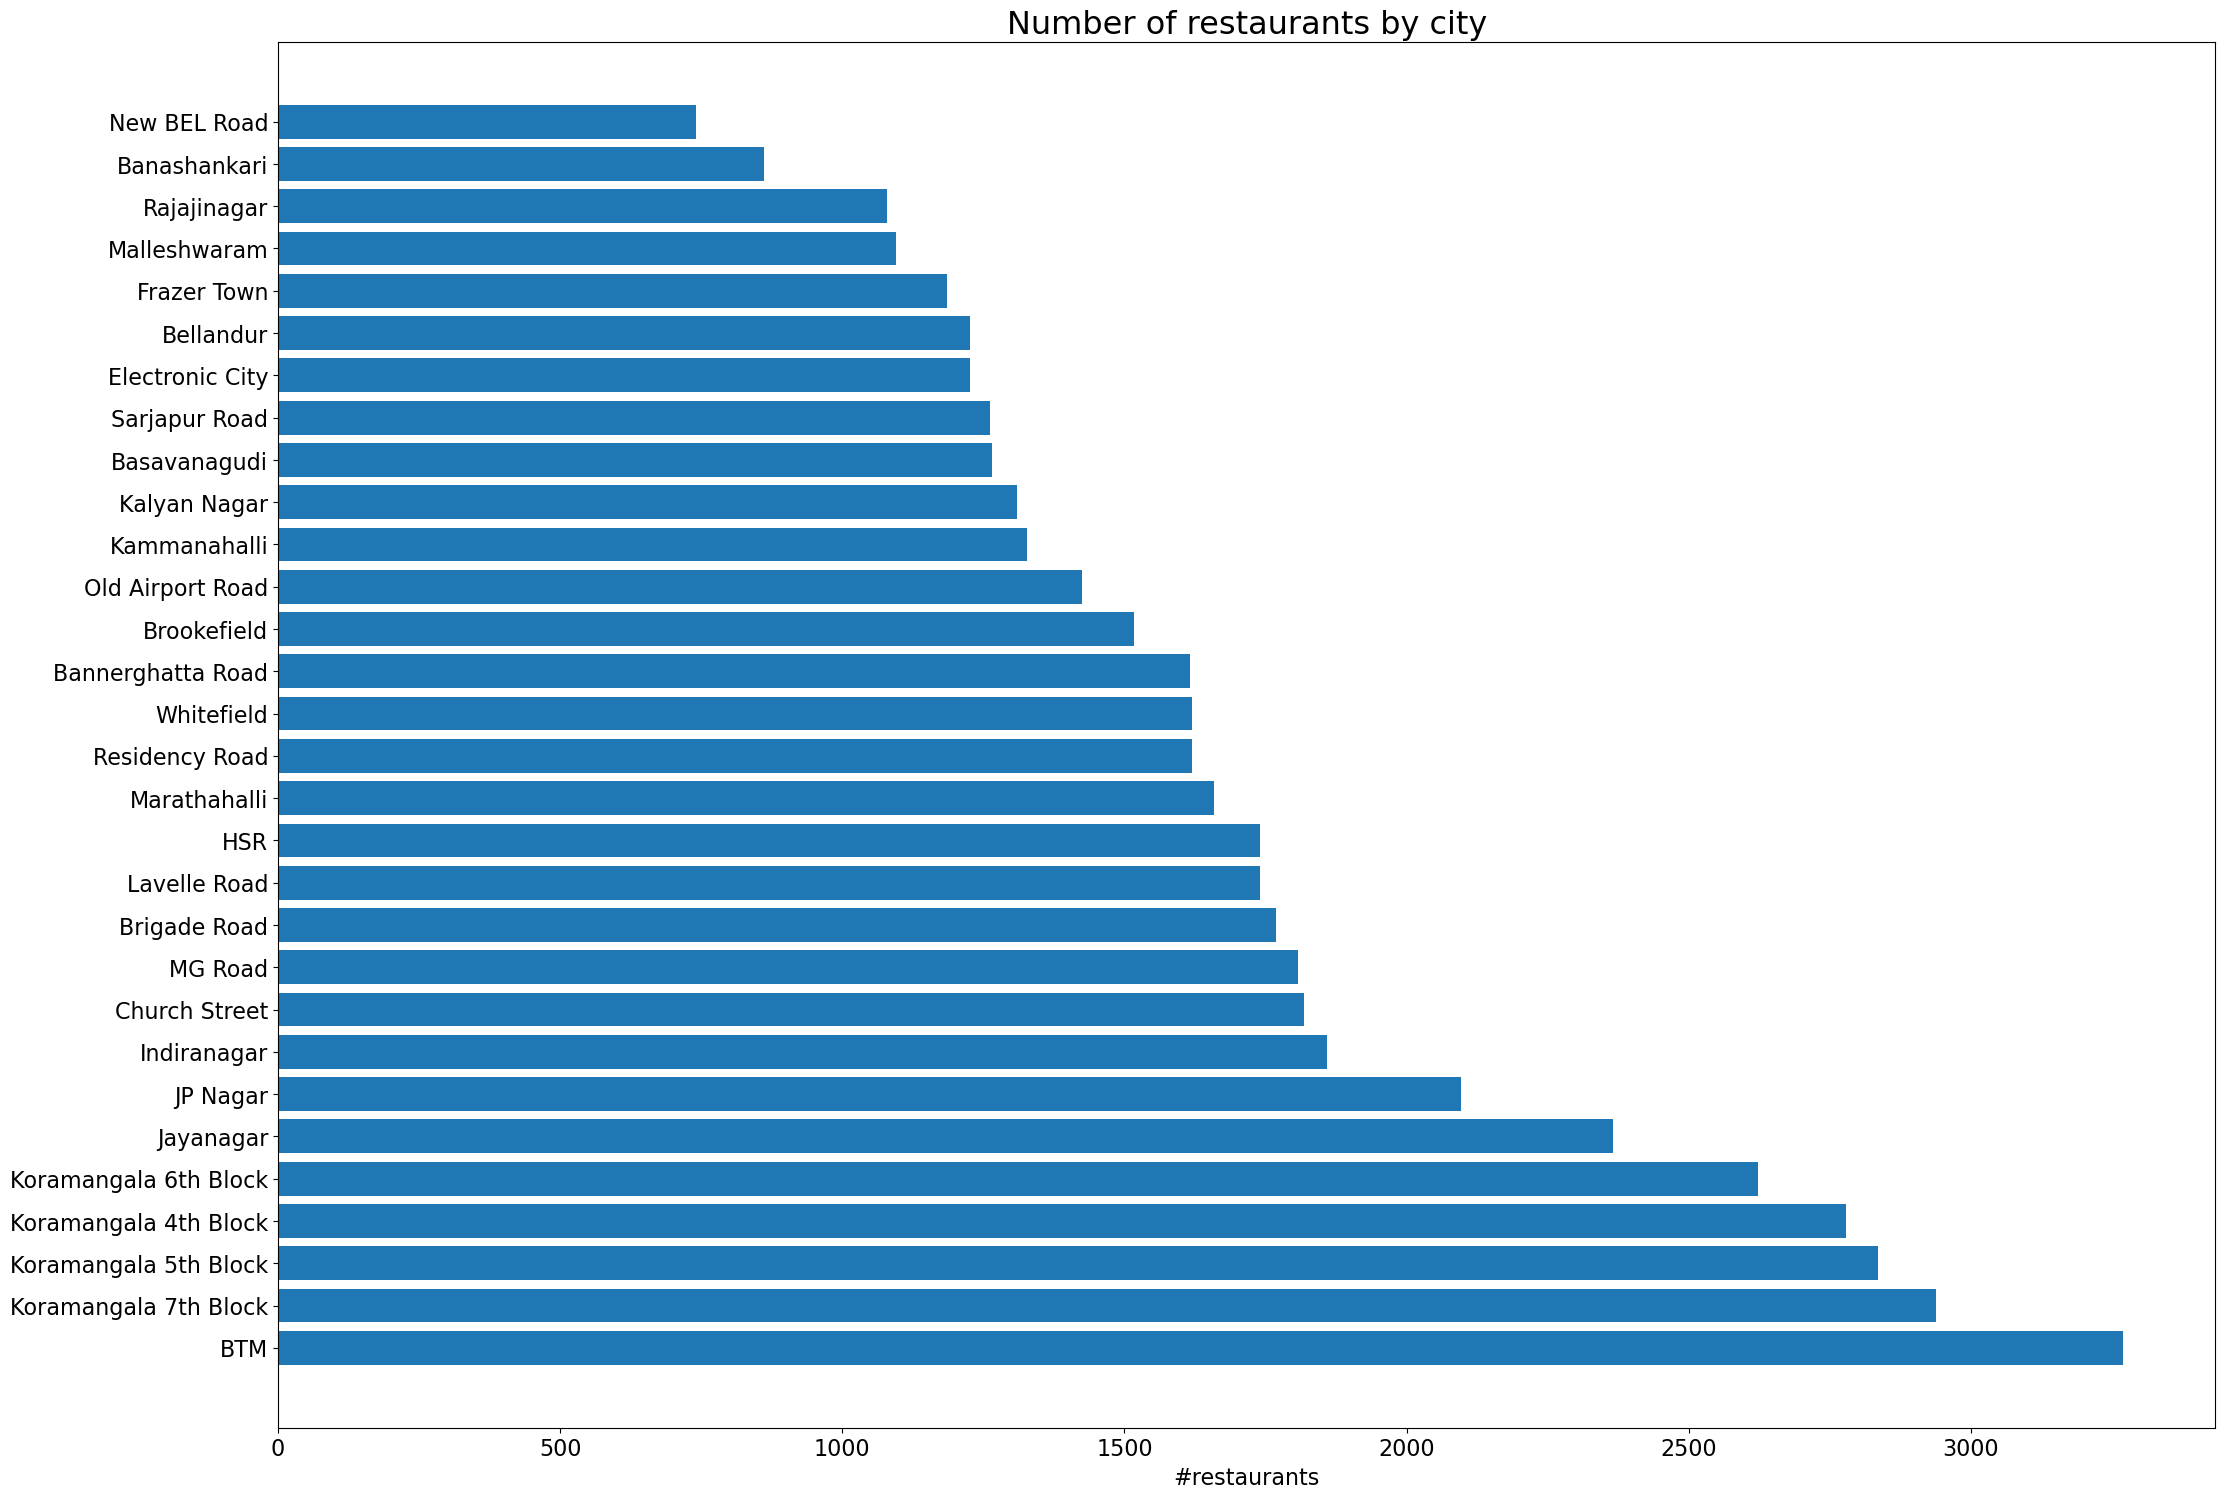

In [55]:
fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1)
ax.barh(y=c_city_res.index, width=c_city_res.values)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_title('Number of restaurants by city', fontdict={'fontsize':23})
ax.set_xlabel('#restaurants', fontdict={'fontsize':16})
plt.show()

_Color Theory:_  
We've already seperated cities (categories) by bars in barchart so seperating them also by color would be _Color Overuse_.

<u>_Conclusion_</u>  
Top 6 cities by the number of restaurants:
1. BTM
2. Koramangala 7th Block
3. Koramangala 5th Block
4. Koramangala 4th Block'
5. Koramangala 4th Block
6. Jayanagar